# Measurement with ZMQ to binary queue example

In [33]:
from qcodes.dataset.measurements import Measurement
from qcodes.tests.instrument_mocks import DummyInstrument
import numpy as np
from typing import Dict, List
from time import sleep

In [2]:
di = DummyInstrument('di', gates=['v1', 'v2'])

In [34]:
meas = Measurement()
meas.register_parameter(di.v1)
meas.register_parameter(di.v2, setpoints=(di.v1,))
meas.write_period = 0.5

In [36]:
with meas.run() as ds:
    for x, y in zip(np.linspace(0, 1, 100), np.cumsum(np.random.randn(101))):
        ds.add_result((di.v1, x), (di.v2, y))
        sleep(0.1)

Starting experimental run with id: 485


In [37]:
ds.dataset.run_id

485

In [7]:
from pickle import Unpickler
import qcodes.ZMQ_learning as qzmq

In [21]:
def read_entire_queue(path: str) -> List[Dict]:
    """
    Read back an entire pickled queue
    """
    queue = []
    with open(path, 'rb') as fh:
        up = Unpickler(fh)
        still_queue_left = True
        while still_queue_left:
            try:
                queue.append(up.load())
            except EOFError:
                still_queue_left = False
        return queue

In [38]:
path = qzmq.__file__.replace('__init__.py', ds.dataset.guid + '.pkl')

In [39]:
results = read_entire_queue(path)

In [45]:
di_v1 = [[]+res['di_v1'] for res in results]

In [46]:
di_v1

[[0.0,
  0.010101010101010102,
  0.020202020202020204,
  0.030303030303030304,
  0.040404040404040407,
  0.050505050505050511],
 [0.060606060606060608,
  0.070707070707070718,
  0.080808080808080815,
  0.090909090909090912,
  0.10101010101010102],
 [0.11111111111111112,
  0.12121212121212122,
  0.13131313131313133,
  0.14141414141414144,
  0.15151515151515152],
 [0.16161616161616163,
  0.17171717171717174,
  0.18181818181818182,
  0.19191919191919193,
  0.20202020202020204],
 [0.21212121212121213,
  0.22222222222222224,
  0.23232323232323235,
  0.24242424242424243,
  0.25252525252525254],
 [0.26262626262626265,
  0.27272727272727276,
  0.28282828282828287,
  0.29292929292929293,
  0.30303030303030304],
 [0.31313131313131315,
  0.32323232323232326,
  0.33333333333333337,
  0.34343434343434348,
  0.35353535353535359],
 [0.36363636363636365,
  0.37373737373737376,
  0.38383838383838387,
  0.39393939393939398,
  0.40404040404040409],
 [0.4141414141414142,
  0.42424242424242425,
  0.4343434

In [27]:
import matplotlib.pyplot as plt

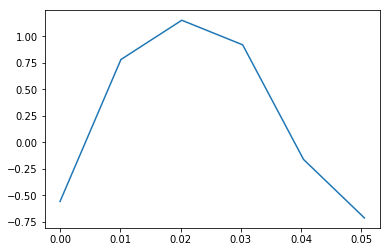

In [41]:
fig, ax = plt.subplots()
ax.plot(results[0]['di_v1'], results[0]['di_v2'])